### Zad 1

In [86]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import scipy.stats as sps

In [27]:
def f(mi,sigma,n,m):
    estims = np.zeros(m)

    for i in range(m):
        data = np.random.lognormal(mi,sigma,n)
        mean = sum(data)/n
        estims[i] = mean
    return estims

empiryczna: 3.0812023978509395
teoretyczna: 3.080216848918031
empiryczna: 0.0026402141745181314
teoretyczna: 0.002694758124344947


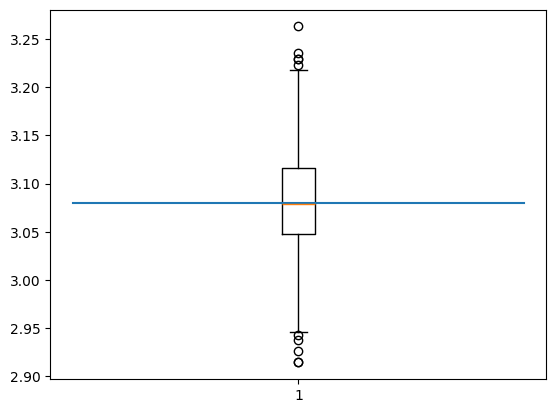

In [69]:
#1
mi = 1
sigma = 0.5
n = 1000
m = 1000

estims = f(mi,sigma,n,m)

print("empiryczna:",np.mean(estims))
print("teoretyczna:",np.exp((sigma**2)/2+mi))
print("empiryczna:",np.power(np.std(estims),2))
print("teoretyczna:" ,np.exp(2*mi+np.power(sigma,2))*(np.exp(np.power(sigma,2))-1)/m)
plt.boxplot(estims)
plt.plot(np.linspace(0,2,n),(np.exp((sigma**2)/2+mi)*np.ones(n)))

empiryczna: 4.486984357729955
teoretyczna: 4.4816890703380645
empiryczna: 0.03631735689830472
teoretyczna: 0.03451261310995657


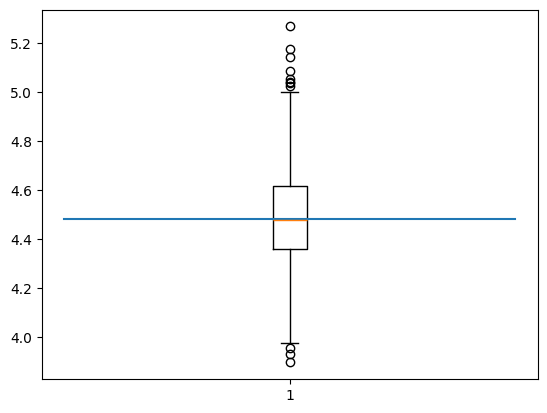

In [68]:
mi = 1
sigma = 1
n = 1000
m = 1000

estims = f(mi,sigma,n,m)
print("empiryczna:",np.mean(estims))
print("teoretyczna:",np.exp((sigma**2)/2+mi))
print("empiryczna:",np.power(np.std(estims),2))
print("teoretyczna:" ,np.exp(2*mi+np.power(sigma,2))*(np.exp(np.power(sigma,2))-1)/m)
plt.boxplot(estims)
plt.plot(np.linspace(0,2,n),(np.exp((sigma**2)/2+mi)*np.ones(n)))

empiryczna: 20.104242530153243
teoretyczna: 20.085536923187668
empiryczna: 14.63786012287933
teoretyczna: 21.62303700131398


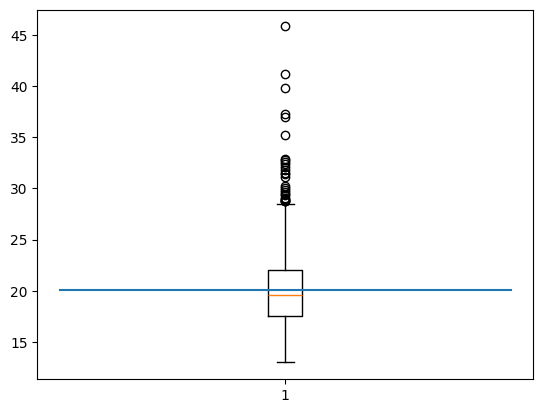

In [70]:
mi = 1
sigma = 2
n = 1000
m = 1000

estims = f(mi,sigma,n,m)

print("empiryczna:",np.mean(estims))
print("teoretyczna:",np.exp((sigma**2)/2+mi))
print("empiryczna:",np.power(np.std(estims),2))
print("teoretyczna:" ,np.exp(2*mi+np.power(sigma,2))*(np.exp(np.power(sigma,2))-1)/m)
plt.boxplot(estims)
plt.plot(np.linspace(0,2,n),(np.exp((sigma**2)/2+mi)*np.ones(n)))

### Zad 2

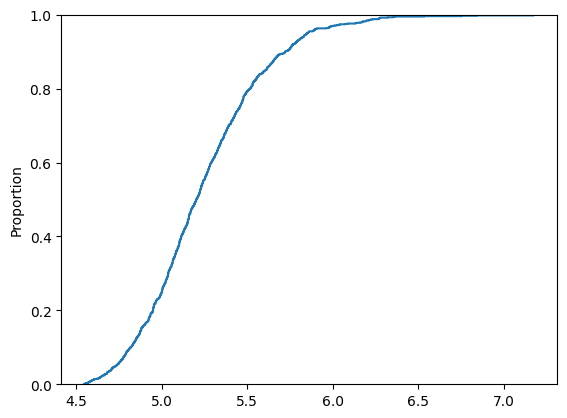

In [92]:
def u_sample_normal(n):
    data = np.random.normal(2,1,n)
    return max(data)

n=1000
u_samples = np.zeros(n)
for i in range(n):
    u_samples[i] = u_sample_normal(n)

sb.ecdfplot(u_samples)
rng = np.linspace(min(u_samples),max(u_samples),len(u_samples))
# plt.plot(rng,sps.norm.cdf(rng))





<Axes: ylabel='Density'>

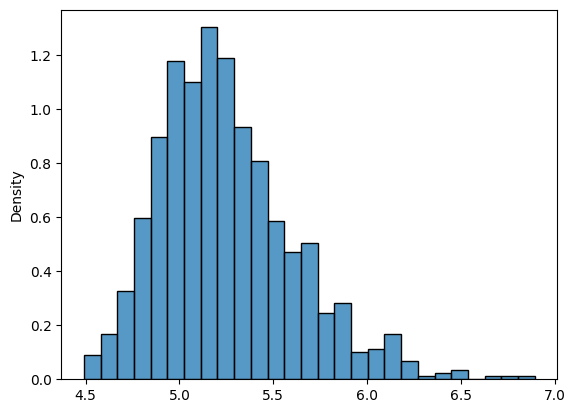

In [82]:
sb.histplot(u_samples,stat="density")